# Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import fftpack

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

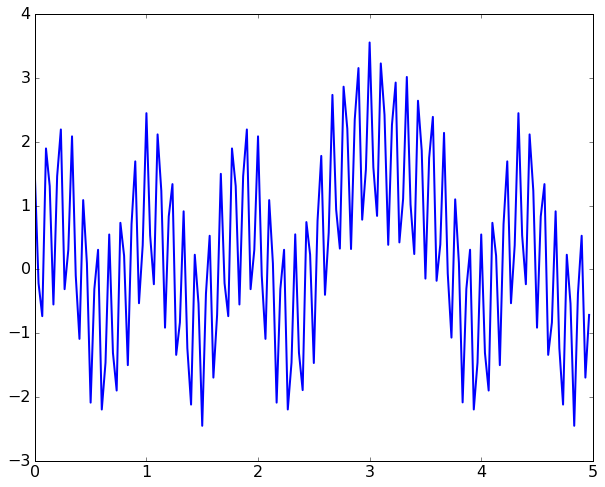

In [2]:
def gaussian(x, mu, sigma, A):
    return A*np.exp(-(x - mu)**2/(2*sigma**2))

sample_rate = 30
T = 5
t = np.linspace(0, T, T*sample_rate, endpoint=False)
y = gaussian(t, 3.1, 0.2, 3) + np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t)
plt.plot(t, y);

In [3]:
# Saving the data (this was how the data was generated)

# data = np.array(list(zip(t, y)))
# np.savetxt("../resources/scipy_filter_data.dat", data)

[ 1.2  9. ]


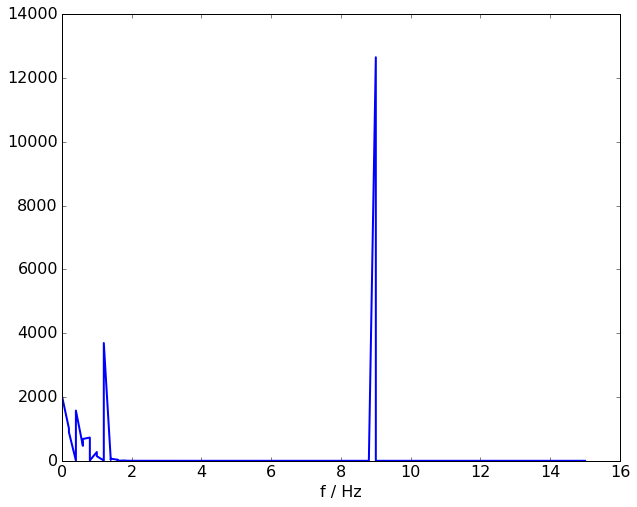

In [4]:
z = fftpack.rfft(y)
f = fftpack.rfftfreq(len(t), t[1] - t[0])

plt.plot(f, np.abs(z)**2)
plt.xlabel('f / Hz')

maxima = f[np.abs(z)**2 > 2100]
print(maxima)

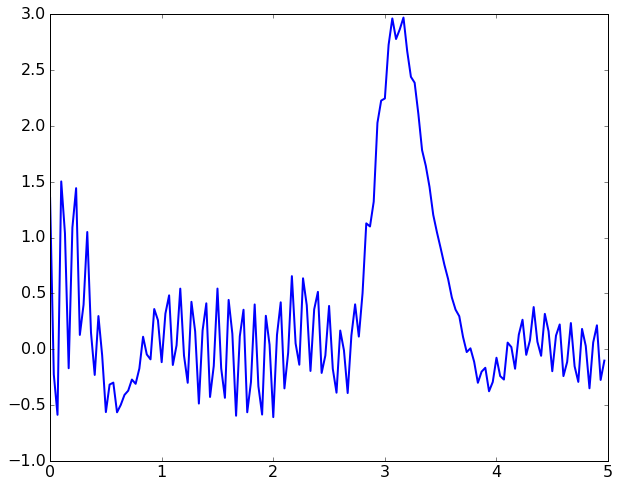

In [5]:
from scipy.signal import butter, lfilter

def bandstop_filter(data, freq_window, fs, order=5):
    nyquist_frequency = fs/2
    freq_window = np.array(freq_window)
    normal_freq = freq_window/nyquist_frequency
    b, a = butter(order, normal_freq, btype='bandstop')
    y = lfilter(b, a, data)
    return y

sample_rate = (len(t) - 1)/(t[-1])
y_filt = bandstop_filter(y, [1.15, 1.25], sample_rate)
y_filt = bandstop_filter(y_filt, [8.9, 9.1], sample_rate)
plt.plot(t, y_filt);

[ 3.14771781  0.20905588  2.91577083]


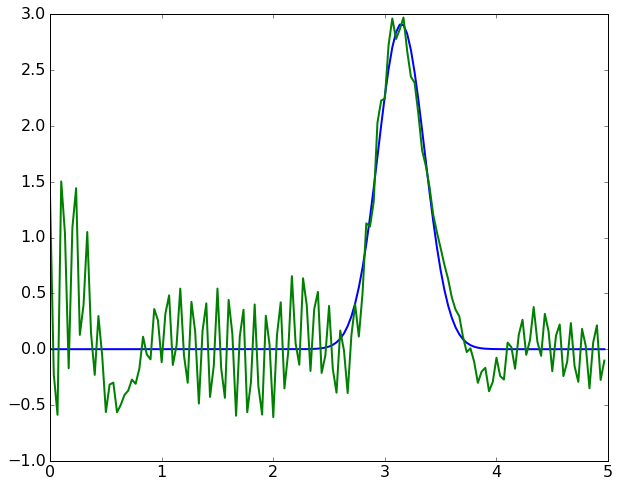

In [6]:
params, __ = curve_fit(gaussian, t, y_filt)
print(params)

plt.plot(t, gaussian(t, *params))
plt.plot(t, y_filt);

# Exercise 2

[0.0, 0.954929658551372, 4.213343393869503e-18, -1.1582419121994119, -6.445393259196511e-18, 0.21928954721622917]


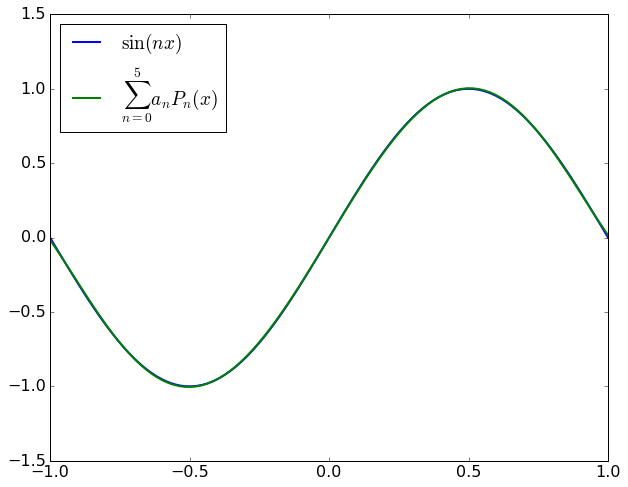

In [9]:
from scipy.special import eval_legendre
from scipy.integrate import quad

def f(x):
    return np.sin(np.pi*x)

def a(n):
    g = lambda x: f(x)*eval_legendre(n, x)
    integral = quad(g, -1, 1)[0]
    return (2*n + 1)/2 * integral

# first few a_n coefficients up to n = 5
print([a(n) for n in range(5+1)])

def legendre_series(x, N):
    y = np.zeros(len(x))
    for n in range(N+1):
        y += a(n)*eval_legendre(n, x)
    return y

x = np.linspace(-1, 1, 100)
plt.plot(x, f(x), label=r'$\sin(nx)$')
plt.plot(x, legendre_series(x, 5), label=r'$\sum_{n=0}^{5} a_n P_n(x)$')
plt.legend(loc='best');